In [2]:
import word2vec

In [3]:
# Setup - train model 
word2vec.word2vec('example/data/text8', 'example/data/text8.bin', size=500, binary=True, verbose=True)

Running command: word2vec -train example/data/text8 -output example/data/text8.bin -size 500 -window 5 -sample 1e-3 -hs 0 -negative 5 -threads 12 -iter 5 -min-count 5 -alpha 0.025 -debug 2 -binary 1 -cbow 1
Starting training using file example/data/text8
Vocab size: 71291
Words in train file: 16718843
Alpha: 0.000002  Progress: 100.02%  Words/thread/sec: 198.66k  .34%  Words/thread/sec: 156.34k   Words/thread/sec: 180.55k  thread/sec: 192.75k  d/sec: 194.20k  /sec: 182.08k  3%  Words/thread/sec: 188.88k  190.85k    .48%  Words/thread/sec: 194.94k  ha: 0.024610  Progress: 1.57%  Words/thread/sec: 189.98k  24560  Progress: 1.77%  Words/thread/sec: 195.21k   195.00k   Progress: 1.98%  Words/thread/sec: 198.31k  ress: 2.08%  Words/thread/sec: 194.99k  ess: 2.18%  Words/thread/sec: 193.64k  ead/sec: 196.05k  read/sec: 198.10k  2.39%  Words/thread/sec: 196.53k  4343  Progress: 2.64%  Words/thread/sec: 194.84k  .024324  Progress: 2.72%  Words/thread/sec: 197.83k  thread/sec: 194.66k  ress: 2.

In [4]:
model = word2vec.load('example/data/text8.bin')

In [5]:
import itertools

countTotal = 0
correctCount = 0
incorrectCount = 0
unrecognizedCount = 0

# Change file name to run experiment on different analogy sets 
with open('./Bigger Analogy Test Set/1_Inflectional_morphology/I01 [noun - plural_reg].txt') as file:
    for line1,line2 in itertools.zip_longest(*[file]*2):
        line1 = line1.split('\t')
        line2 = line2.split('\t')
        line1[1] = line1[1].split('/')
        for i in range(len(line1[1])):
            line1[1][i] = line1[1][i].rstrip()
            if line1[1][i].__contains__('-'):
                line1[1].pop(i)
        line2[1] = line2[1].split('/')
        for i in range(len(line2[1])):
            line2[1][i] = line2[1][i].rstrip()
            if line2[1][i].__contains__('-'):
                line2[1].pop(i)
        countTotal += 1
        try:
            line2[1].append(line1[0])
            indexes, metrics = model.analogy(pos=line2[1], neg=line1[1])
            if (model.vocab[indexes].__contains__(line2[0])):
                correctCount += 1
                print("Correct answer is " + line2[0] + ". Model guessed correctly.")
            else:
                incorrectCount += 1
                print("Correct answer is " + line2[0] + ". Model guessed " + model.vocab[indexes][0])
        except Exception as e:
             unrecognizedCount += 1
             print("Correct answer is " + line2[0] + ". Model did not recognize the word " + e.args[0])
        #print(line1[0], line1[1], line2[0], line2[1])
    print("Accuracy rate: ", correctCount/countTotal*100, "%")

Correct answer is application. Model guessed correctly.
Correct answer is car. Model guessed correctly.
Correct answer is council. Model guessed correctly.
Correct answer is day. Model guessed months
Correct answer is department. Model guessed offices
Correct answer is difference. Model guessed correctly.
Correct answer is event. Model guessed correctly.
Correct answer is fact. Model guessed explanation
Correct answer is god. Model guessed goddess
Correct answer is hour. Model guessed correctly.
Correct answer is language. Model guessed correctly.
Correct answer is member. Model guessed correctly.
Correct answer is night. Model guessed wednesday
Correct answer is period. Model guessed correctly.
Correct answer is population. Model guessed correctly.
Correct answer is product. Model guessed correctly.
Correct answer is river. Model guessed correctly.
Correct answer is role. Model guessed correctly.
Correct answer is solution. Model guessed correctly.
Correct answer is street. Model gues

In [153]:
import pandas as pd

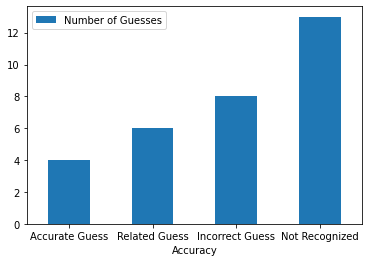

In [154]:
df = pd.DataFrame({'Accuracy':['Accurate Guess', 'Related Guess', 'Incorrect Guess', 'Not Recognized'], 'Number of Guesses':[correctCount, 6, incorrectCount, unrecognizedCount]})
ax = df.plot.bar(x='Accuracy', y='Number of Guesses', rot=0)

## Experiment Takeaways

1. The model seems to perform much better on the **inflectional morphology** dataset. 
- This is likely an inherent quality of the word2vec model. 
- For context: **inflectional morphology** does not change the part of speech of a word, and is associated with relationships *between* words (ex. changing a verb from its singular form to plural form in order to match the subject of a sentence). In contrast, **derivational morphology** can often change the part of speech of a word, and is associated with semantic relationships *within* a word itself (ex. changing a verb to an adverb usually has no relationship to the rest of a sentence). [See this handout for more info.](http://websites.umich.edu/~jlawler/Inflection.pdf)
- Because word2vec compares relationships *between* words, it seems inherently better suited to analyze these types of analogies. 
2. The impact of bias/variance can be seen in the results comparing accuracy across dimensional values. 
- In the case of 5-dimension vectors, the vectors are really too small to be of much use, resulting in extremely poor results (never scoring above 4% accuracy). The model is unable to distinguish relevant relationships between the words because the vectors are so small, resulting in a high degree of *bias*. Increasing the dimensions to 50 helps significantly, but issues still persist. 
- However, beyond about 1000-dimension vectors does not seem to increase the accuracy of the results and in fact seems to worsen the accuracy in certain cases. This is likely due to overfitting or *bias* with such large vectors. 
- Overall, anywhere from 500-1500 dimension vectors will likely provide a suitable model. 
3. The model's results are ***heavily*** dependent on the training data set. 
- Certain analogy sets were not usable because the words used did not appear in the training set, resulting in complete failure. 
- However, beyond just not including words in the training set, some relationships were indiscernable even if all words were in the training set. 
- An example of this is the UK city -> County data set, which associates cities in the UK with the county they are located in. The model recognized every word used in every analogy. However, the training set likely did not include any sentences indicating the relationship between these words as cities/counties, and thus the model was never able to get any of the analogies correct. 
- This has probably been discussed at length for machine learning algorithms in general, but still an important reminder that the biases present in the training data sets for these models will become very apparent when putting them into practice. Thus it is important to use a diverse and varied data set for these types of algorithms. 
